##### Problem Statement
I want to find out if we can predict if a patient has diabetes or not based on various medical details

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Features
1. Number of times patient has been pregnant
2. Plasma glucose concentration
3. Diastolic blood pressure
4. Triceps fold skin thickness
5. 2-hour serum insulin
6. Body Mass Index
7. Diabetes pedigree fuction - How likely a patient is to have diabetes based on family history
8. Patient age
9. Outcome of diabetes (1 for yes, 0 for no)


In [3]:
df.shape

(768, 9)

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


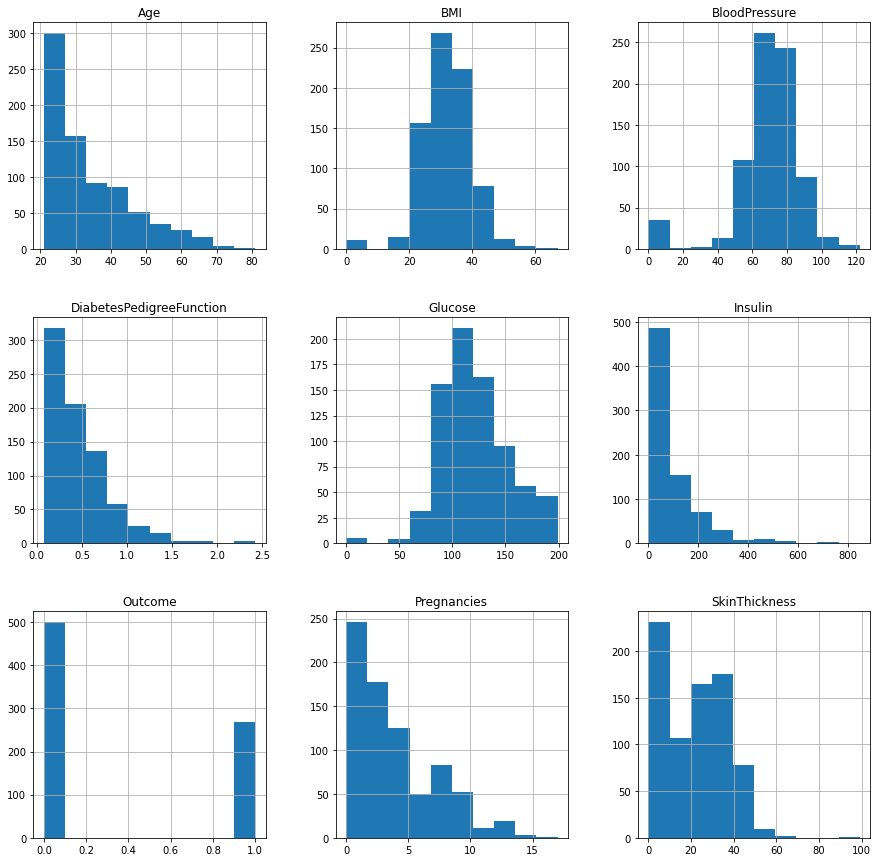

In [6]:
df.hist(figsize=(15, 15));

We see we have a lot of 0's for things that should be impossible to have 0's, such as skin thickness and blood pressure, so we will go ahead and replace these with their respective means.

In [7]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [9]:
meanlist1 = df['Outcome']==1
df[meanlist1].mean()

Pregnancies                   4.865672
Glucose                     142.319549
BloodPressure                75.321429
SkinThickness                33.000000
Insulin                     206.846154
BMI                          35.406767
DiabetesPedigreeFunction      0.550500
Age                          37.067164
Outcome                       1.000000
dtype: float64

In [10]:
meanlist2 = df['Outcome']==0
df[meanlist2].mean()

Pregnancies                   3.298000
Glucose                     110.643863
BloodPressure                70.877339
SkinThickness                27.235457
Insulin                     130.287879
BMI                          30.859674
DiabetesPedigreeFunction      0.429734
Age                          31.190000
Outcome                       0.000000
dtype: float64

In [11]:
#do our replacing

#insulin
replaceList = np.where((df['Insulin'].isnull()) & (df['Outcome'] == 1))
mylist = replaceList[0].tolist()
mylist
df.loc[mylist, 'Insulin'] = 206.85


replaceList = np.where((df['Insulin'].isnull()) & (df['Outcome'] == 0))
mylist = replaceList[0].tolist()
mylist
df.loc[mylist, 'Insulin'] = 130.3

#glucose
replaceList = np.where((df['Glucose'].isnull()) & (df['Outcome'] == 1))
mylist = replaceList[0].tolist()
mylist
df.loc[mylist, 'Glucose'] = 142.3


replaceList = np.where((df['Glucose'].isnull()) & (df['Outcome'] == 0))
mylist = replaceList[0].tolist()
mylist
df.loc[mylist, 'Glucose'] = 110.64

#bloodpressure
replaceList = np.where((df['BloodPressure'].isnull()) & (df['Outcome'] == 1))
mylist = replaceList[0].tolist()
mylist
df.loc[mylist, 'BloodPressure'] = 75.32


replaceList = np.where((df['BloodPressure'].isnull()) & (df['Outcome'] == 0))
mylist = replaceList[0].tolist()
mylist
df.loc[mylist, 'BloodPressure'] = 70.87

#skinthickness
replaceList = np.where((df['SkinThickness'].isnull()) & (df['Outcome'] == 1))
mylist = replaceList[0].tolist()
mylist
df.loc[mylist, 'SkinThickness'] = 33


replaceList = np.where((df['SkinThickness'].isnull()) & (df['Outcome'] == 0))
mylist = replaceList[0].tolist()
mylist
df.loc[mylist, 'SkinThickness'] = 27.23

#BMI
replaceList = np.where((df['BMI'].isnull()) & (df['Outcome'] == 1))
mylist = replaceList[0].tolist()
mylist
df.loc[mylist, 'BMI'] = 35.4


replaceList = np.where((df['BMI'].isnull()) & (df['Outcome'] == 0))
mylist = replaceList[0].tolist()
mylist
df.loc[mylist, 'BMI'] = 30.86

In [12]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,206.85,33.6,0.627,50,1
1,1,85.0,66.0,29.0,130.30,26.6,0.351,31,0
2,8,183.0,64.0,33.0,206.85,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.00,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.00,43.1,2.288,33,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


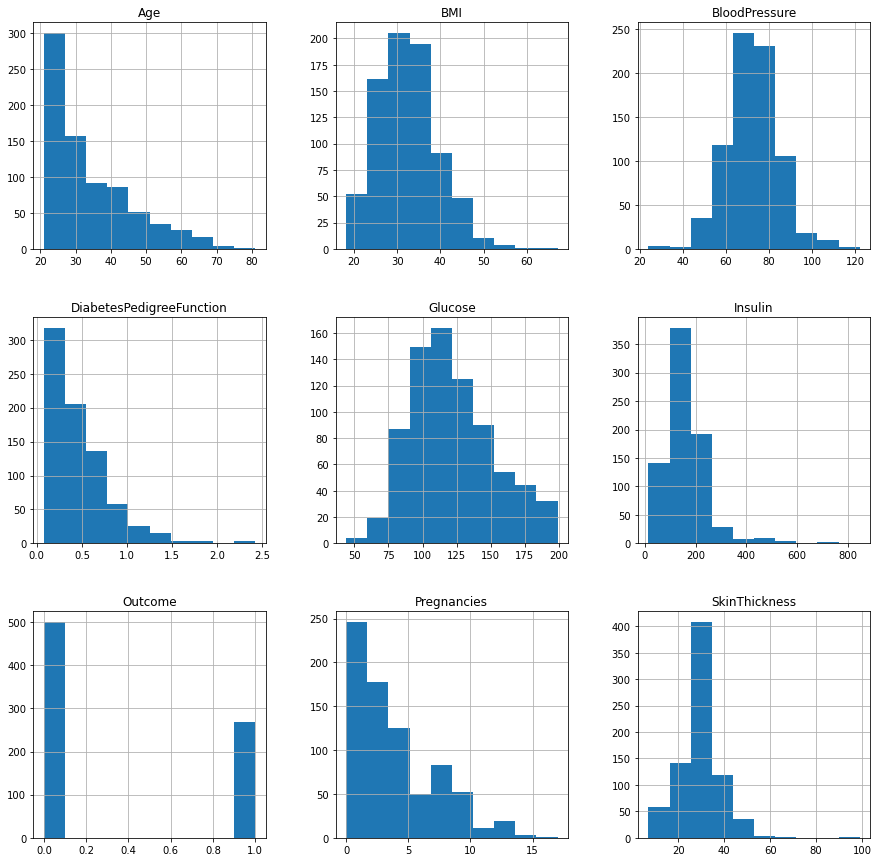

In [14]:
df.hist(figsize=(15, 15));

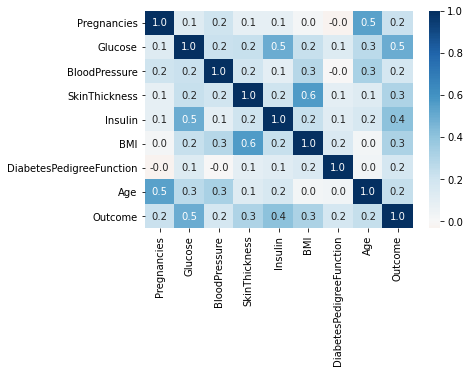

In [15]:
corr = df.corr()
fig, ax = plt.subplots()
sns.heatmap(corr, annot = True, fmt = ".1f", cmap = "RdBu", center = 0)

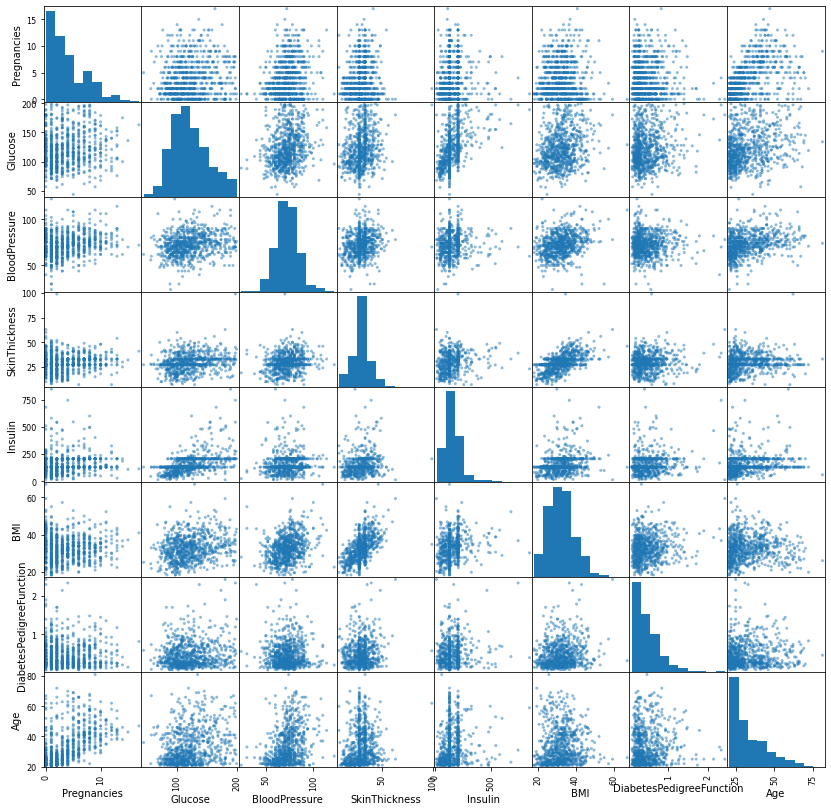

In [16]:
scatterdf = df[['Pregnancies', 'Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
pd.plotting.scatter_matrix(scatterdf, figsize = (14,14));

Here I picked out a few plots that I thought might have good predicting data.  I colored all the dots for patients that have diabetes red, and the patients without diabetes blue.

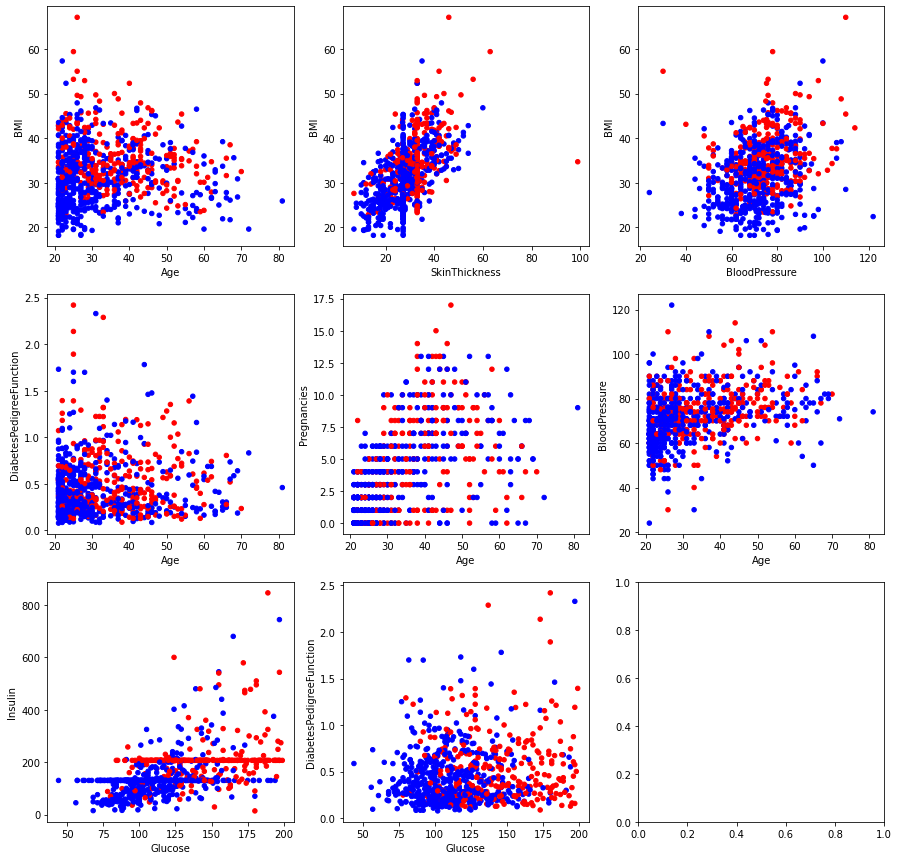

In [17]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize = (15,15))
df.plot.scatter(x='Age', y='BMI',
                c=['red' if c == 1 else 'blue' for c in df.Outcome], ax = axes[0][0]);
df.plot.scatter(x='SkinThickness', y='BMI',
                c=['red' if c == 1 else 'blue' for c in df.Outcome], ax = axes[0][1]);
df.plot.scatter(x='BloodPressure', y='BMI',
                c=['red' if c == 1 else 'blue' for c in df.Outcome], ax = axes[0][2]);


df.plot.scatter(x='Age', y='DiabetesPedigreeFunction',
                c=['red' if c == 1 else 'blue' for c in df.Outcome], ax = axes[1][0]);
df.plot.scatter(x='Age', y='Pregnancies',
                c=['red' if c == 1 else 'blue' for c in df.Outcome], ax = axes[1][1]);
df.plot.scatter(x='Age', y='BloodPressure',
                c=['red' if c == 1 else 'blue' for c in df.Outcome], ax = axes[1][2]);

df.plot.scatter(x='Glucose', y='Insulin',
                c=['red' if c == 1 else 'blue' for c in df.Outcome], ax = axes[2][0]);
df.plot.scatter(x='Glucose', y='DiabetesPedigreeFunction',
                c=['red' if c == 1 else 'blue' for c in df.Outcome], ax = axes[2][1]);



## MODELS
Classification Algorithms
- Decision Trees
- Logistic Regression

imports to do our decision tree

In [18]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from dmba import plotDecisionTree, classificationSummary


Here we get a dataframe of our predictors

In [19]:
columns = list(df.columns)
columns.remove('Outcome')
predictors_df = df[columns]
predictors_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,206.85,33.6,0.627,50
1,1,85.0,66.0,29.0,130.30,26.6,0.351,31
2,8,183.0,64.0,33.0,206.85,23.3,0.672,32
3,1,89.0,66.0,23.0,94.00,28.1,0.167,21
4,0,137.0,40.0,35.0,168.00,43.1,2.288,33


I will now split the data into train and test sets

In [20]:
X = predictors_df
y = df['Outcome']

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)
train_X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
309,2,124.0,68.0,28.00,205.00,32.9,0.875,30
162,0,114.0,80.0,34.00,285.00,44.2,0.167,27
67,2,109.0,92.0,27.23,130.30,42.7,0.845,54
124,0,113.0,76.0,33.00,206.85,33.3,0.278,23
39,4,111.0,72.0,47.00,207.00,37.1,1.390,56


# Decision Tree

Here we can plot an untrimmed decision tree, and we see it is extremely overfit, giving us 100% accuracy on the training dataset, but only 82% on the validation dataset

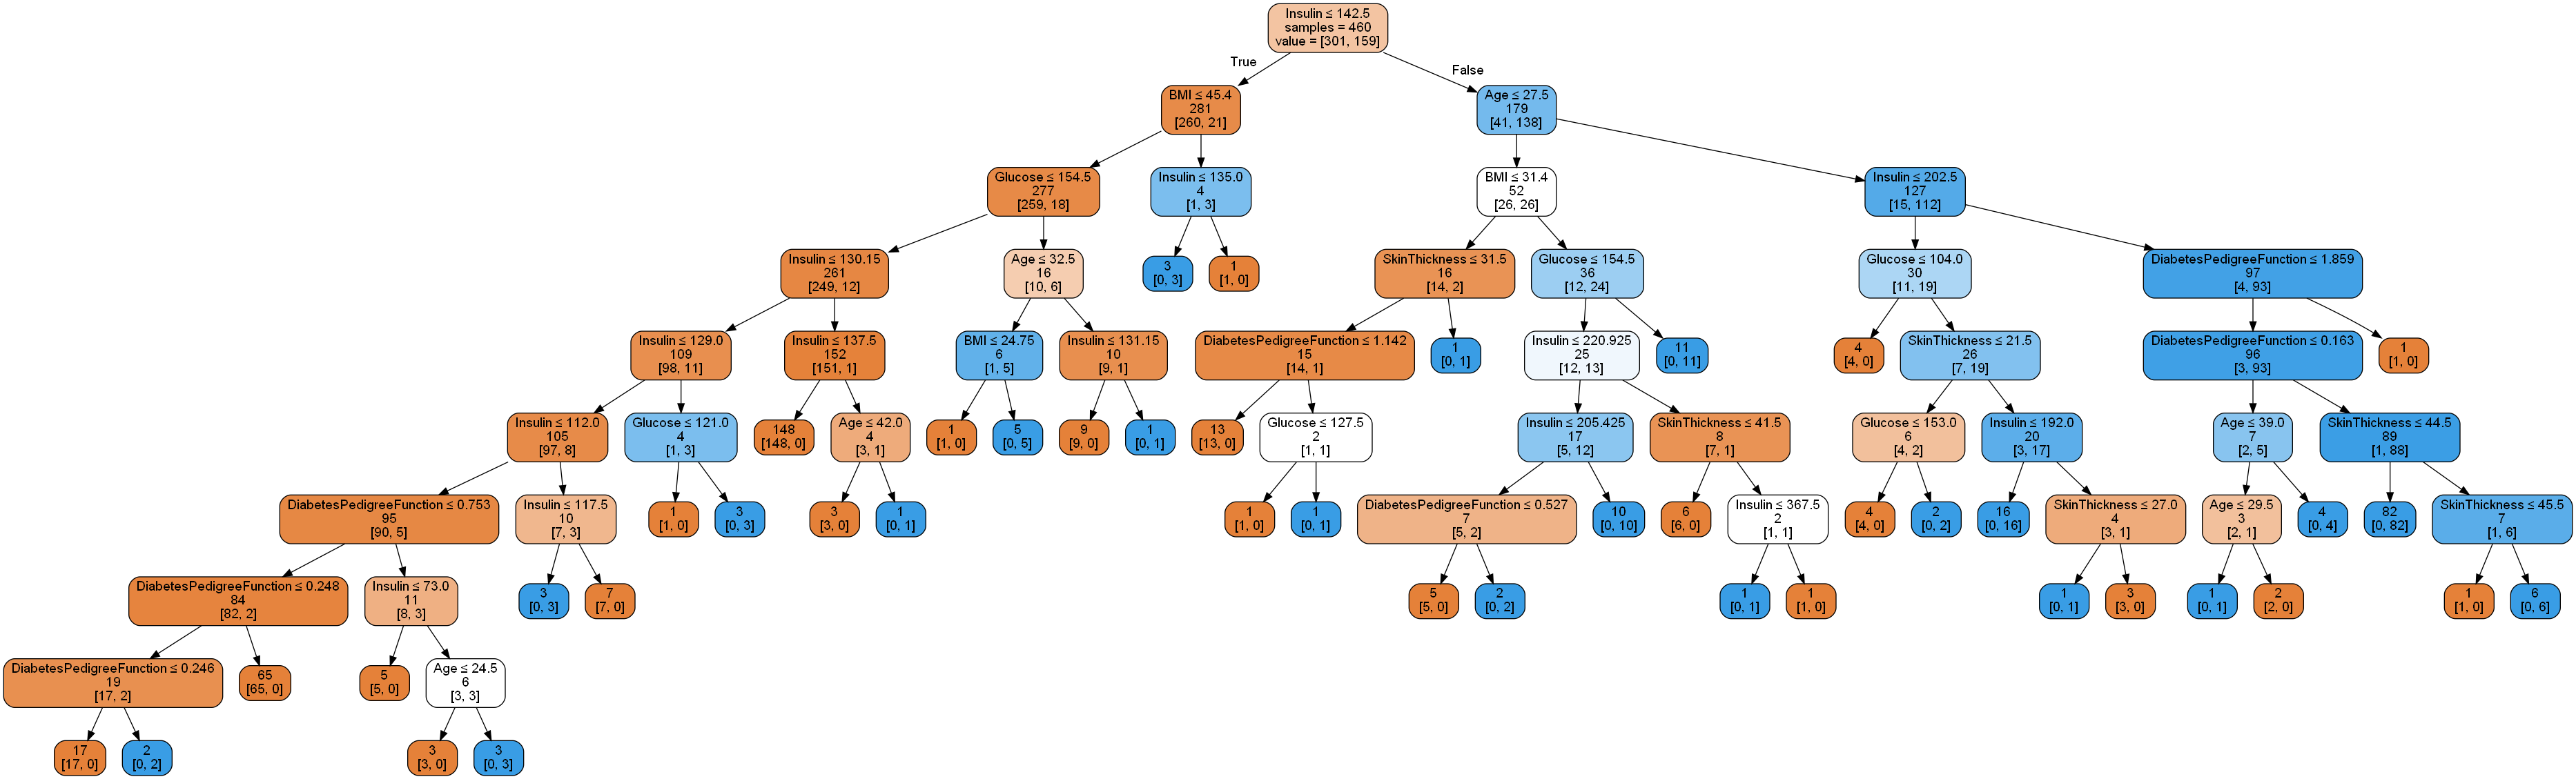

In [21]:
fullClassTree = DecisionTreeClassifier()
fullClassTree.fit(train_X, train_y)

plotDecisionTree(fullClassTree, feature_names=train_X.columns)

In [22]:
classificationSummary(train_y, fullClassTree.predict(train_X))
classificationSummary(valid_y, fullClassTree.predict(valid_X))

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual   0   1
     0 301   0
     1   0 159
Confusion Matrix (Accuracy 0.8149)

       Prediction
Actual   0   1
     0 166  33
     1  24  85


Now we'll use gridsearch to find our best paramaters for the tree to maximize accuracy and minimize overfitting

In [23]:
param_grid = {
    'max_depth': list(range(2, 8)), 
    'min_samples_split': list(range(10, 25)), 
    'min_impurity_decrease': [0.0009, 0.001, 0.0011, .00111], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('score: ', gridSearch.best_score_)
print('parameters: ', gridSearch.best_params_)

score:  0.8847826086956522
parameters:  {'max_depth': 7, 'min_impurity_decrease': 0.00111, 'min_samples_split': 15}


In [24]:
BestTree = gridSearch.best_estimator_

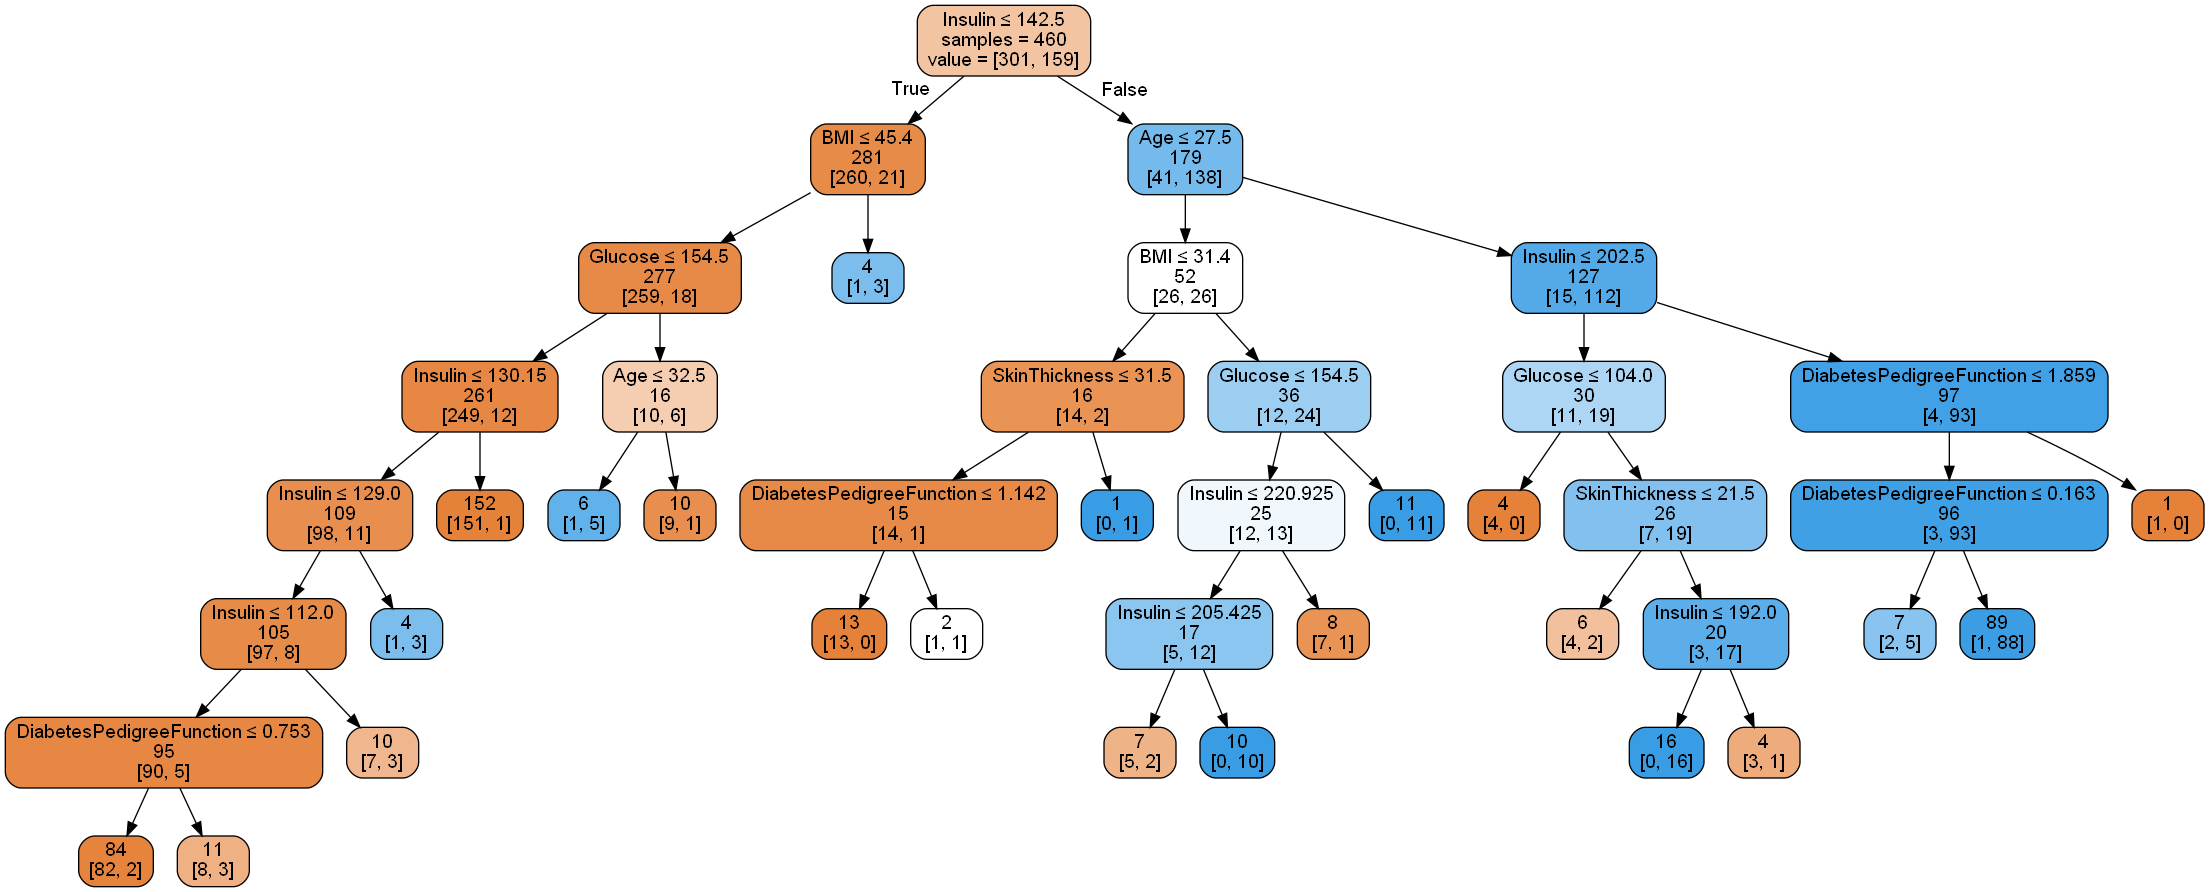

In [25]:
plotDecisionTree(BestTree, feature_names=train_X.columns)

In [26]:
classificationSummary(train_y, BestTree.predict(train_X))
classificationSummary(valid_y, BestTree.predict(valid_X))

Confusion Matrix (Accuracy 0.9500)

       Prediction
Actual   0   1
     0 295   6
     1  17 142
Confusion Matrix (Accuracy 0.8312)

       Prediction
Actual   0   1
     0 176  23
     1  29  80


In [27]:
from sklearn.ensemble import RandomForestClassifier
X = predictors_df
y = df['Outcome']
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

rf = RandomForestClassifier(n_estimators=100, random_state=1)
rf.fit(train_X, train_y)
classificationSummary(valid_y, rf.predict(valid_X))

Confusion Matrix (Accuracy 0.8539)

       Prediction
Actual   0   1
     0 180  19
     1  26  83


                    feature  importance       std
0               Pregnancies    0.047553  0.024668
2             BloodPressure    0.050843  0.027892
6  DiabetesPedigreeFunction    0.064282  0.032559
7                       Age    0.068186  0.036279
5                       BMI    0.092847  0.049293
1                   Glucose    0.132765  0.082778
3             SkinThickness    0.146301  0.112407
4                   Insulin    0.397223  0.182473


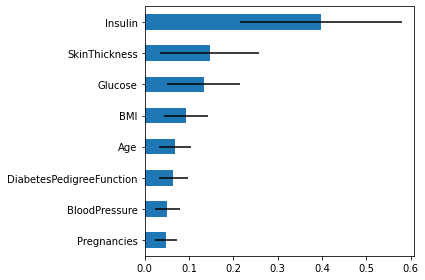

In [28]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

featuredf = pd.DataFrame({'feature': train_X.columns, 'importance': importances, 'std': std})
featuredf = featuredf.sort_values('importance')
print(featuredf)

ax = featuredf.plot(kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')

plt.tight_layout()
plt.show()

# Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

import matplotlib.pylab as plt

from dmba import AIC_score
from dmba import backward_elimination, forward_selection
from dmba import gainsChart


Run a quick regression on our top 3 most important variables according to the random forest

In [30]:
X = df[['Insulin','SkinThickness','Glucose']]
y = df['Outcome']
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)
importance_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
importance_reg.fit(train_X, train_y)

classificationSummary(train_y, importance_reg.predict(train_X))
classificationSummary(valid_y, importance_reg.predict(valid_X))

Confusion Matrix (Accuracy 0.8043)

       Prediction
Actual   0   1
     0 268  33
     1  57 102
Confusion Matrix (Accuracy 0.8084)

       Prediction
Actual   0   1
     0 176  23
     1  36  73


Do a logistic regression with all of our predictors now, and find their coeffecients

In [31]:
X = predictors_df
y = df['Outcome']
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_X, train_y)

LogisticRegression(C=1e+42, solver='liblinear')

In [32]:
print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns).transpose())
print()
print('AIC', AIC_score(valid_y, logit_reg.predict(valid_X), df = len(train_X.columns) + 1))

intercept  -9.46813575878606
       Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin  \
coeff     0.058349  0.024556      -0.016245       0.030079  0.012342   

            BMI  DiabetesPedigreeFunction       Age  
coeff  0.086288                  0.159095  0.025251  

AIC 410.13139297299637


Classification results of this logistic regression, as well as a gains chart

Confusion Matrix (Accuracy 0.8152)

       Prediction
Actual   0   1
     0 269  32
     1  53 106
Confusion Matrix (Accuracy 0.7922)

       Prediction
Actual   0   1
     0 177  22
     1  42  67


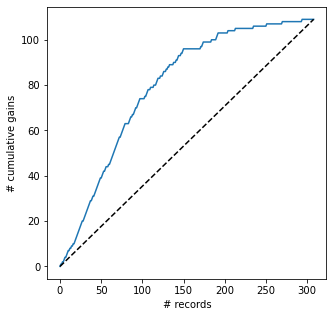

In [33]:
classificationSummary(train_y, logit_reg.predict(train_X))
classificationSummary(valid_y, logit_reg.predict(valid_X))

logit_reg_pred = logit_reg.predict_proba(valid_X)
full_result = pd.DataFrame({'actual': valid_y, 
                            'p(0)': [p[0] for p in logit_reg_pred],
                            'p(1)': [p[1] for p in logit_reg_pred],
                            'predicted': logit_reg.predict(valid_X)})
full_result = full_result.sort_values(by=['p(1)'], ascending=False)



dfresult = full_result.sort_values(by=['p(1)'], ascending=False)

gainsChart(dfresult.actual, figsize = [5,5])
    
plt.show()

Trying backwards elimination on our variables to see if we can cut some out

In [34]:
X = predictors_df
y = df['Outcome']
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

def train_model(variables):
    model = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model, backward_variables = backward_elimination(train_X.columns, train_model, score_model, verbose=True)

print(backward_variables)
print()
classificationSummary(valid_y, best_model.predict(valid_X[backward_variables]))

Variables: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age
Start: score=534.68
Step: score=501.01, remove Glucose
Step: score=489.21, remove BMI
Step: score=458.33, remove BloodPressure
Step: score=458.33, remove None
['Pregnancies', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction', 'Age']

Confusion Matrix (Accuracy 0.8279)

       Prediction
Actual   0   1
     0 178  21
     1  32  77


Now we will see if forward selection will give us any better results

In [35]:
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df=1)
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model, forward_variables = forward_selection(train_X.columns, train_model, score_model, verbose=True)

print(forward_variables)
print()
classificationSummary(valid_y, best_model.predict(valid_X[forward_variables]))

Variables: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age
Start: score=625.66, constant
Step: score=432.03, add Insulin
Step: score=382.06, add DiabetesPedigreeFunction
Step: score=382.06, add None
['Insulin', 'DiabetesPedigreeFunction']

Confusion Matrix (Accuracy 0.8052)

       Prediction
Actual   0   1
     0 175  24
     1  36  73


# Neural Net


In [36]:
from sklearn.neural_network import MLPClassifier

Trying a neural net with 2 hidden layers

In [37]:
X = predictors_df
y = df['Outcome']
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)
classes = sorted(y.unique())

clf = MLPClassifier(hidden_layer_sizes=(3), activation='logistic', solver='lbfgs', random_state=1)
clf.fit(train_X, train_y.values)

MLPClassifier(activation='logistic', hidden_layer_sizes=3, random_state=1,
              solver='lbfgs')

In [38]:
classificationSummary(train_y, clf.predict(train_X))

# validation performance
classificationSummary(valid_y, clf.predict(valid_X))

Confusion Matrix (Accuracy 0.6543)

       Prediction
Actual   0   1
     0 301   0
     1 159   0
Confusion Matrix (Accuracy 0.6461)

       Prediction
Actual   0   1
     0 199   0
     1 109   0


Now using gridsearch to find the optimal number of hidden layers for our neural network

In [39]:
param_grid = {
    'hidden_layer_sizes': [(1), (2), (3), (4), (5)], 
}
gridSearch = GridSearchCV(MLPClassifier(activation='logistic', solver='lbfgs', random_state=1), 
                          param_grid, cv=5, n_jobs=-1, return_train_score=True)
gridSearch.fit(train_X, train_y)
print('Initial score: ', gridSearch.best_score_)
print('Initial parameters: ', gridSearch.best_params_)

Initial score:  0.8
Initial parameters:  {'hidden_layer_sizes': 5}


In [40]:
clf = MLPClassifier(hidden_layer_sizes=(5), activation='logistic', solver='lbfgs', random_state=1)
clf.fit(train_X, train_y.values)
classificationSummary(train_y, clf.predict(train_X))

# validation performance
classificationSummary(valid_y, clf.predict(valid_X))

Confusion Matrix (Accuracy 0.8283)

       Prediction
Actual   0   1
     0 250  51
     1  28 131
Confusion Matrix (Accuracy 0.7468)

       Prediction
Actual   0   1
     0 153  46
     1  32  77


We can see that changing our hidden layer size to 5 increased our prediction accuracy quite a bit

In [44]:
newdf =(pd.concat([df,pd.DataFrame(clf.predict_proba(X), columns=[0, 1])
], axis=1))
newdf.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,0,1
0,6,148.0,72.00,35.00,206.85,33.6,0.627,50,1,0.281546,0.718454
1,1,85.0,66.00,29.00,130.30,26.6,0.351,31,0,0.899490,0.100510
2,8,183.0,64.00,33.00,206.85,23.3,0.672,32,1,0.281546,0.718454
3,1,89.0,66.00,23.00,94.00,28.1,0.167,21,0,0.899490,0.100510
4,0,137.0,40.00,35.00,168.00,43.1,2.288,33,1,0.281546,0.718454
5,5,116.0,74.00,27.23,130.30,25.6,0.201,30,0,0.899490,0.100510
6,3,78.0,50.00,32.00,88.00,31.0,0.248,26,1,0.899490,0.100510
7,10,115.0,70.87,27.23,130.30,35.3,0.134,29,0,0.899490,0.100510
8,2,197.0,70.00,45.00,543.00,30.5,0.158,53,1,0.281546,0.718454
9,8,125.0,96.00,33.00,206.85,35.4,0.232,54,1,0.281546,0.718454
